In [18]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [19]:
notes = pd.read_csv("notes_with_topics.tsv", sep="\t")

In [20]:
ratings = pd.read_csv("../ratings-00006.tsv", sep="\t")

In [21]:
df = ratings.merge(
    notes,
    on="noteId",
    how="inner"
)

In [22]:
df.shape

(473, 62)

In [23]:
TOPK = 10


post_counts = notes["topic"].value_counts(dropna=False)
top_topics = post_counts.head(TOPK).index.tolist()

posts_topic_plot = notes["topic"].where(notes["topic"].isin(top_topics), "Other Topics")
posts_frac = posts_topic_plot.value_counts(normalize=True).sort_values(ascending=False) * 100

ratings_topic_plot = df["topic"].where(df["topic"].isin(top_topics), "Other Topics")
ratings_frac = ratings_topic_plot.value_counts(normalize=True).reindex(posts_frac.index, fill_value=0) * 100



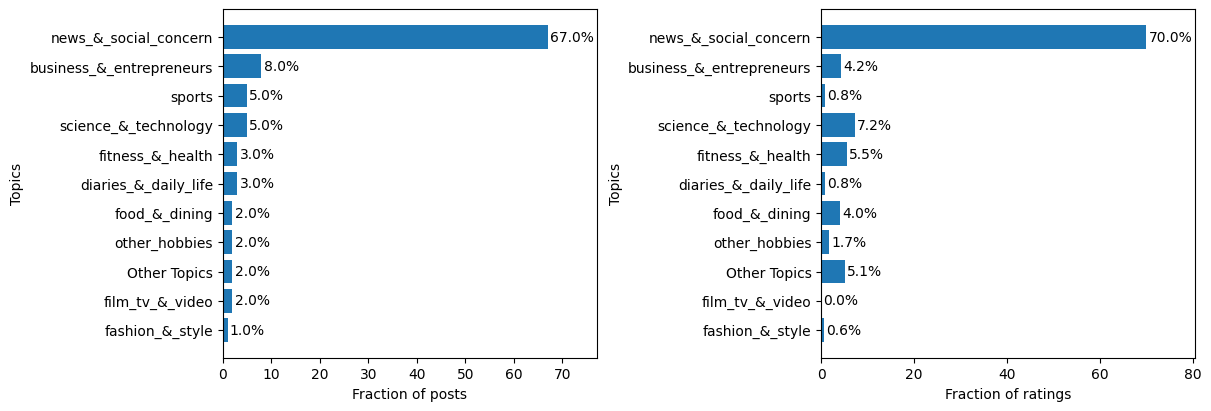

In [ ]:


def _barh_with_pct(ax, series_pct, xlabel):
    ax.barh(series_pct.index, series_pct.values)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Topics")

    for y, v in enumerate(series_pct.values):
        ax.text(v + 0.5, y, f"{v:.1f}%", va="center")

    ax.set_xlim(0, max(10, series_pct.max() * 1.15))

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

_barh_with_pct(axes[0], posts_frac, "Fraction of posts")
_barh_with_pct(axes[1], ratings_frac, "Fraction of ratings")

plt.show()


In [25]:
status_map = {
    "HELPFUL": "HELPFUL",
    "NOT_HELPFUL": "NOT HELPFUL",
    "SOMEWHAT_HELPFUL": "NEEDS MORE RATINGS"
}

df["note_status"] = df["helpfulnessLevel"].map(status_map)


In [26]:
df["note_status"].value_counts()


note_status
HELPFUL               309
NOT HELPFUL           151
NEEDS MORE RATINGS     13
Name: count, dtype: int64

In [27]:
top_topics = (
    df["topic"]
    .value_counts()
    .head(10)
    .index
    .tolist()
)

df_s11 = df[df["topic"].isin(top_topics)].copy()


In [28]:
STATUS_ORDER = ["HELPFUL", "NOT HELPFUL", "NEEDS MORE RATINGS"]

ct = (
    df_s11
    .groupby(["topic", "note_status"])
    .size()
    .unstack(fill_value=0)
)

for s in STATUS_ORDER:
    if s not in ct.columns:
        ct[s] = 0
ct = ct[STATUS_ORDER]

ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

ct_pct = ct_pct.sort_values("HELPFUL", ascending=False)

ct_pct.head()


note_status,HELPFUL,NOT HELPFUL,NEEDS MORE RATINGS
topic,,,
fashion_&_style,100.000000,0.000000,0.000000
science_&_technology,91.176471,8.823529,0.000000
fitness_&_health,88.461538,7.692308,3.846154
business_&_entrepreneurs,80.000000,20.000000,0.000000
food_&_dining,68.421053,15.789474,15.789474


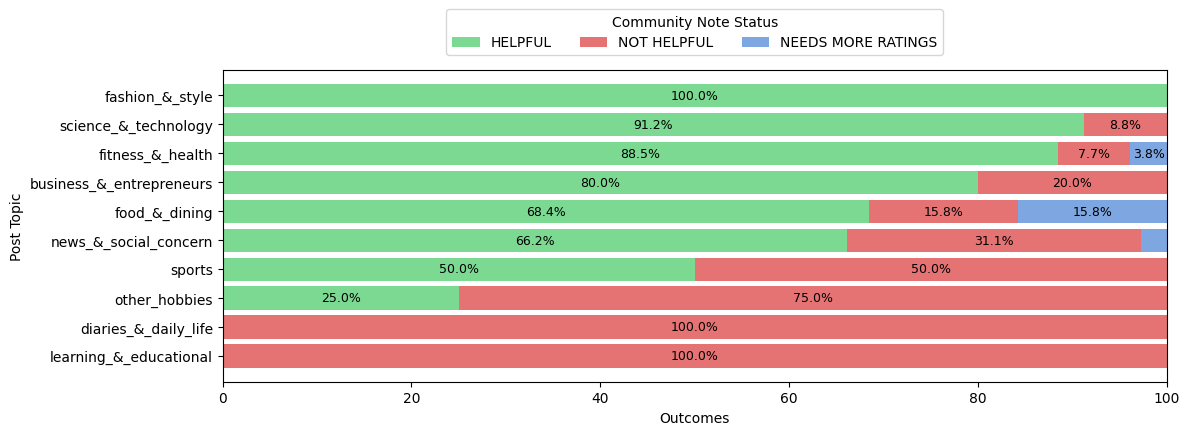

In [29]:
fig, ax = plt.subplots(figsize=(12, 4.5))

y = np.arange(len(ct_pct.index))
left = np.zeros(len(ct_pct.index))

colors = {
    "HELPFUL": "#7cd992",
    "NOT HELPFUL": "#e57373",
    "NEEDS MORE RATINGS": "#7ea6e0",
}

for status in STATUS_ORDER:
    vals = ct_pct[status].values
    ax.barh(y, vals, left=left, label=status, color=colors[status])

    for i, (l, v) in enumerate(zip(left, vals)):
        if v >= 3:
            ax.text(l + v / 2, i, f"{v:.1f}%", ha="center", va="center", fontsize=9)

    left += vals

ax.set_yticks(y)
ax.set_yticklabels(ct_pct.index)
ax.invert_yaxis()
ax.set_xlim(0, 100)
ax.set_xlabel("Outcomes")
ax.set_ylabel("Post Topic")
ax.legend(
    title="Community Note Status",
    ncols=3,
    bbox_to_anchor=(0.5, 1.12),
    loc="center"
)

plt.tight_layout()
plt.show()


In [30]:
df.head()

,noteId,raterParticipantId,createdAtMillis_x,version,agree,disagree,helpful,notHelpful,helpfulnessLevel,helpfulOther,...,summary,isMediaNote,isCollaborativeNote,lang,summary_en,topic,topic_confidence,political_subcategory,political_subcat_conf,note_status
0,1644065505483935757,CC67E47BECB07CE1CBBE2A8B6183E074FAFF663EB15B0F...,1.680816e+12,2.0,0.0,0.0,0.0,0.0,HELPFUL,0.0,...,Rebekah Jones’s 13 year old son was arrested f...,0,0,en,Rebekah Jones’s 13 year old son was arrested f...,news_&_social_concern,0.995765,105 - Military: Negative,0.044287,HELPFUL
1,1861353668726985156,C7DD0435CD958287BBCAF185A92589CAEF476CC4758448...,1.732715e+12,2.0,0.0,0.0,0.0,0.0,NOT_HELPFUL,0.0,...,You will not receive a picture in your DM. It ...,1,0,en,You will not receive a picture in your DM. It ...,science_&_technology,0.806780,NaN,NaN,NOT HELPFUL
2,1623316765852704771,C6568C8713EF2781D62ABB8F97ACE8EA56C7ACA78EBDEB...,1.675900e+12,2.0,0.0,0.0,0.0,0.0,HELPFUL,0.0,...,This video is a parody of the 2023 State of th...,0,0,en,This video is a parody of the 2023 State of th...,news_&_social_concern,0.990723,601 - National Way of Life: Positive,0.032181,HELPFUL
3,1687464668355522561,054C516B656308097B1344E8E33AAFE9373800F5964203...,1.691199e+12,2.0,0.0,0.0,0.0,0.0,NOT_HELPFUL,0.0,...,コミュニティノートを張ること自体はよいのですが、リンクの https://www.moj....,0,0,ja,It is good to keep a community note on its own...,news_&_social_concern,0.844442,413 - Nationalisation,0.035295,NOT HELPFUL
4,1861353668726985156,565E749CEB27F316A4A8173B776BCE86246C016947C3D2...,1.732624e+12,2.0,0.0,0.0,0.0,0.0,HELPFUL,0.0,...,You will not receive a picture in your DM. It ...,1,0,en,You will not receive a picture in your DM. It ...,science_&_technology,0.806780,NaN,NaN,HELPFUL


In [31]:
df.columns

Index(['noteId', 'raterParticipantId', 'createdAtMillis_x', 'version', 'agree',
       'disagree', 'helpful', 'notHelpful', 'helpfulnessLevel', 'helpfulOther',
       'helpfulInformative', 'helpfulClear', 'helpfulEmpathetic',
       'helpfulGoodSources', 'helpfulUniqueContext', 'helpfulAddressesClaim',
       'helpfulImportantContext', 'helpfulUnbiasedLanguage', 'notHelpfulOther',
       'notHelpfulIncorrect', 'notHelpfulSourcesMissingOrUnreliable',
       'notHelpfulOpinionSpeculationOrBias', 'notHelpfulMissingKeyPoints',
       'notHelpfulOutdated', 'notHelpfulHardToUnderstand',
       'notHelpfulArgumentativeOrBiased', 'notHelpfulOffTopic',
       'notHelpfulSpamHarassmentOrAbuse', 'notHelpfulIrrelevantSources',
       'notHelpfulOpinionSpeculation', 'notHelpfulNoteNotNeeded',
       'ratedOnTweetId', 'ratingSourceBucketed', 'noteAuthorParticipantId',
       'createdAtMillis_y', 'tweetId', 'classification', 'believable',
       'harmful', 'validationDifficulty', 'misleadingOther',
 